# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [31]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [32]:
# Importing the file porter_data_1.csv
porter = pd.read_csv("porter_data_1.csv")

porter.dtypes
 

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [33]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter['created_at'] = pd.to_datetime(porter['created_at']) 
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time']) 
porter.dtypes


market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [34]:
# Convert categorical features to category type

categorical_columns = ["order_protocol", "isWeekend", "order_day"]
porter[categorical_columns] = porter[categorical_columns].astype('category')

KeyError: "['isWeekend', 'order_day'] not in index"

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes
porter['delivery_time_taken'] = porter['actual_delivery_time'] - porter['created_at']


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp

porter['order_hour'] = porter['created_at'].dt.hour
porter['order_day'] = porter['created_at'].dt.day_name() 
# Create a categorical feature 'isWeekend'
porter['isWeekend'] = porter['created_at'].dt.dayofweek >= 5  # Returns True for Saturday (5) and Sunday (6)
porter['isWeekend'] = porter['isWeekend'].astype('category')
print(porter)



In [ ]:
# Drop unnecessary columns
columns_to_drop = ['market_id', 'store_primary_category', 'min_item_price']
porter = porter.drop(columns=columns_to_drop)
porter.head

print(porter.columns)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
y = porter['delivery_time_taken']
X = porter[['total_items', 'subtotal', 'distance']]
print("Target variable (y):")
print(y.head())


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [35]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_columns = porter.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = porter.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical Columns: []


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

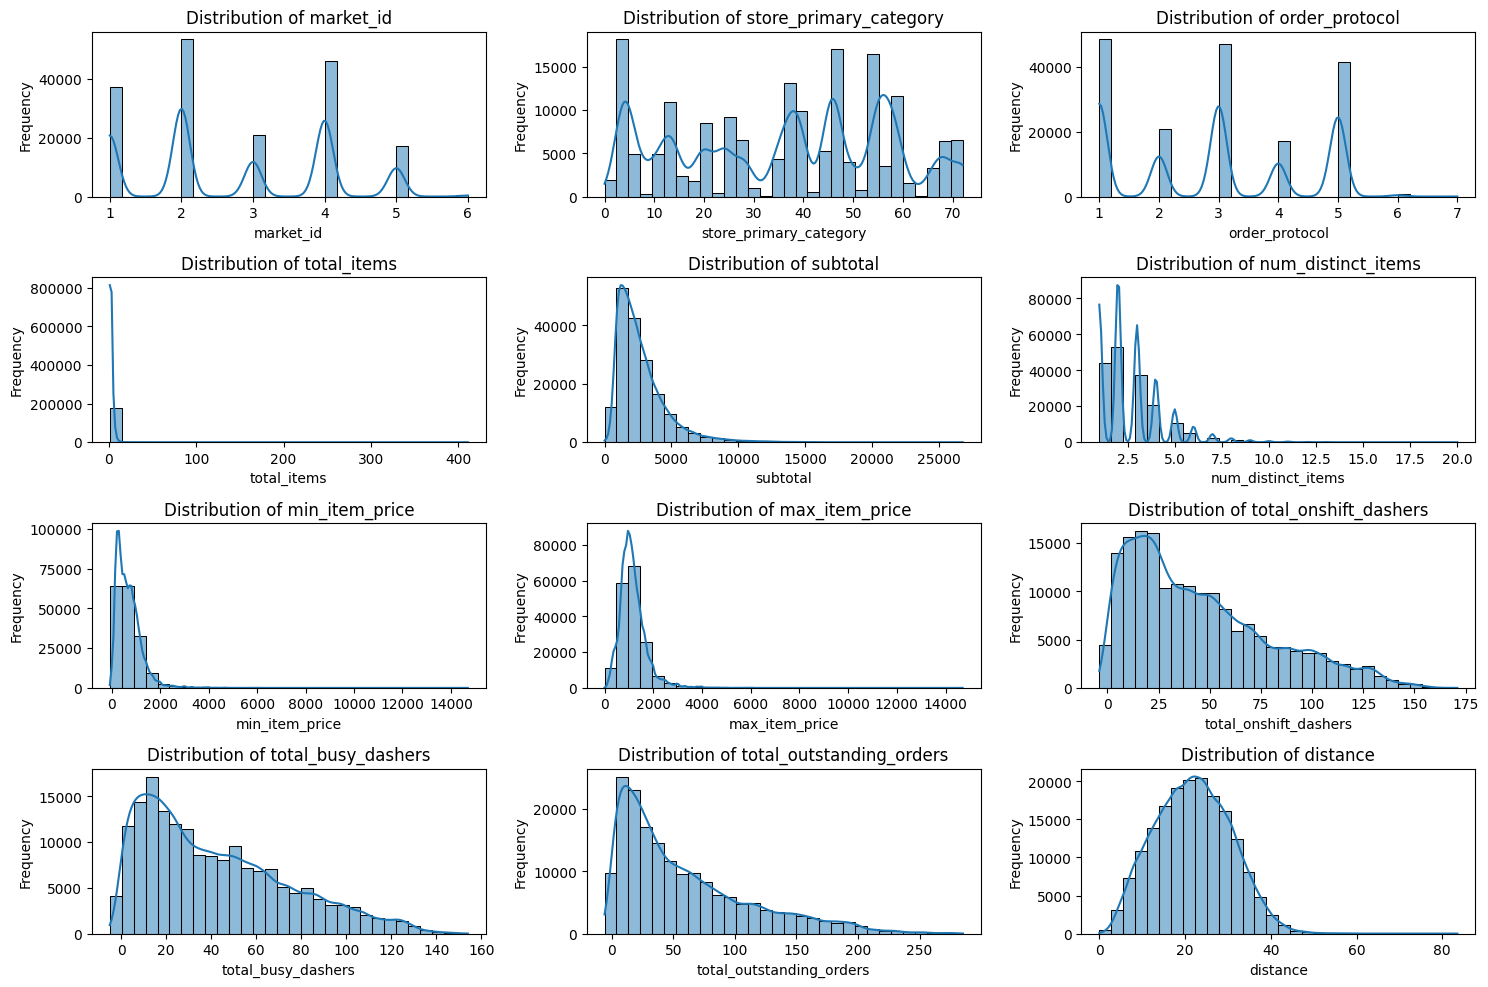

In [36]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 12))
 
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.histplot(porter[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

 
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [37]:
# Distribution of categorical columns
numerical_columns = porter.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = porter.select_dtypes(include=['object', 'category']).columns.tolist()
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i + 1)
    sns.countplot(data=porter, y=col, order=porter[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
plt.show()


<Figure size 1500x1200 with 0 Axes>

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [38]:
# Distribution of time_taken
porter["delivery_time_taken_minutes"] = porter["delivery_time_taken"].dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
sns.histplot(porter["delivery_time_taken_minutes"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Delivery Time Taken (Minutes)")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.show()

KeyError: 'delivery_time_taken'

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
 
porter["delivery_time_taken_minutes"] = porter["delivery_time_taken"].dt.total_seconds() / 60
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns[:4]):  
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=porter, x=col, y="delivery_time_taken_minutes", alpha=0.5, color="royalblue")
    plt.title(f"{col} vs Delivery Time Taken (Minutes)")
    plt.xlabel(col)
    plt.ylabel("Delivery Time (Minutes)")

plt.tight_layout()
plt.show()

In [ ]:
# Show the distribution of time_taken for different hours

porter["delivery_time_taken_minutes"] = porter["delivery_time_taken"].dt.total_seconds() / 60

plt.figure(figsize=(12, 6))
sns.boxplot(data=porter, x="order_hour", y="delivery_time_taken_minutes", palette="viridis")

plt.title("Distribution of Delivery Time Across Different Hours")
plt.xlabel("Order Hour")
plt.ylabel("Delivery Time (Minutes)")
plt.xticks(rotation=45)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [67]:
# Plot the heatmap of the correlation matrix
porter["delivery_time_taken_minutes"] = porter["delivery_time_taken"].dt.total_seconds() / 60
numerical_columns = porter.select_dtypes(include=['int64', 'float64']).columns.tolist()

 
if "delivery_time_taken_minutes" not in numerical_columns:
    numerical_columns.append("delivery_time_taken_minutes")

correlation_matrix = porter[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

KeyError: 'delivery_time_taken'

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
correlation_with_target = correlation_matrix["delivery_time_taken_minutes"].abs().sort_values()
threshold = 0.1
weak_features = correlation_with_target[correlation_with_target < threshold].index.tolist()
porter = porter.drop(columns=weak_features)



#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [ ]:
# Boxplot for time_taken
plt.figure(figsize=(8, 5))
sns.boxplot(x=porter["delivery_time_taken_minutes"], color="royalblue")
plt.title("Boxplot of Delivery Time Taken")
plt.xlabel("Delivery Time Taken (Minutes)")
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

scaler = StandardScaler() 
porter[numerical_columns] = scaler.fit_transform(porter[numerical_columns])

print(porter.head())

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [47]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

 
# Define target variable (y) and features (X)
y = porter['actual_delivery_time']
X = porter[['total_items', 'subtotal', 'distance']]
print("Target variable (y):")
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Target variable (y):
0   2015-02-06 23:11:17
1   2015-02-10 22:33:25
2   2015-02-16 01:06:35
3   2015-02-12 04:35:46
4   2015-01-27 02:58:36
Name: actual_delivery_time, dtype: datetime64[ns]


In [48]:
# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [49]:
# Make predictions
y_pred = model.predict(X_test)

In [51]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test = y_test.astype('int64')
y_pred = y_pred.astype('int64')

mae = mean_absolute_error(y_test, y_pred)   
mse = mean_squared_error(y_test, y_pred)   
rmse = mse ** 0.5 
r2 = r2_score(y_test, y_pred)   

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 602677354217018.7500
Mean Squared Error (MSE): 4402117605059173.0000
Root Mean Squared Error (RMSE): 66348455.9358
R² Score: 0.0002


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

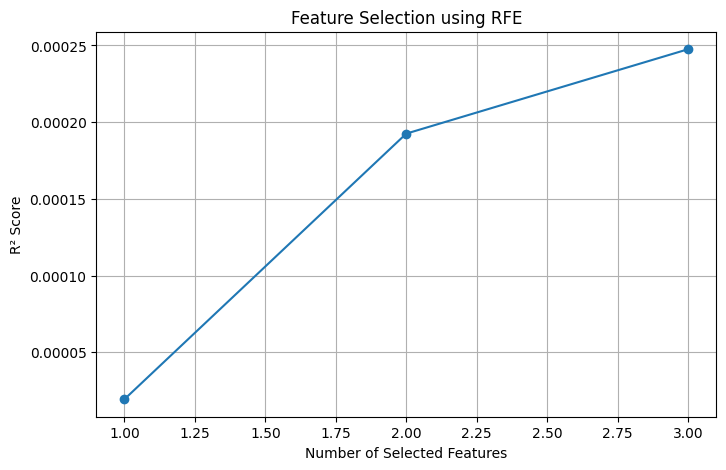

Optimal Number of Features: 3


In [68]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
num_features = X_train.shape[1]
scores = [] 
for n in range(1, num_features + 1):
    rfe = RFE(estimator=model, n_features_to_select=n)
    X_rfe_train = rfe.fit_transform(X_train, y_train)
    X_rfe_test = rfe.transform(X_test)

    # Train the model with selected features
    model.fit(X_rfe_train, y_train)
    y_pred = model.predict(X_rfe_test)

    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    scores.append((n, r2))  # Store results
results_df = pd.DataFrame(scores, columns=["Num_Features", "R2_Score"])
plt.figure(figsize=(8, 5))
plt.plot(results_df["Num_Features"], results_df["R2_Score"], marker='o', linestyle='-')
plt.xlabel("Number of Selected Features")
plt.ylabel("R² Score")
plt.title("Feature Selection using RFE")
plt.grid(True)
plt.show()

best_n_features = results_df.loc[results_df["R2_Score"].idxmax(), "Num_Features"]
print(f"Optimal Number of Features: {best_n_features}")

In [62]:
# Build the final model with selected number of features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
final_model = LinearRegression()
 
best_n_features = 3   
 
rfe = RFE(estimator=final_model, n_features_to_select=best_n_features)
rfe.fit(X_train, y_train)   
 
selected_features = X_train.columns[rfe.support_]  
 
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)
 
final_model.fit(X_train_selected, y_train)
 
y_pred = final_model.predict(X_test_selected)

 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"✅ Final Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
 


✅ Final Model Evaluation Metrics:
Mean Absolute Error (MAE): 602677354217018.7500
Mean Squared Error (MSE): 483804328743776881761518092288.0000
Root Mean Squared Error (RMSE): 695560442193039.6250


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

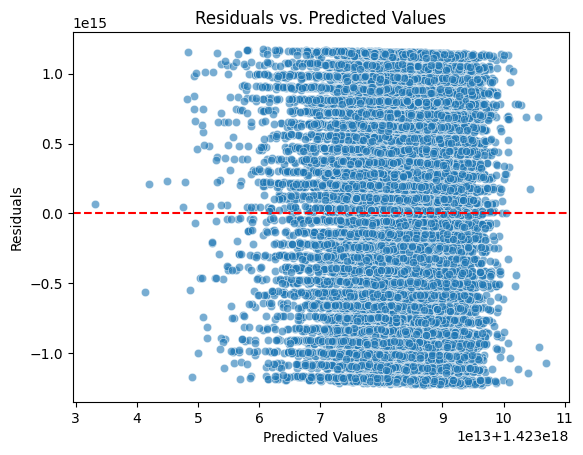

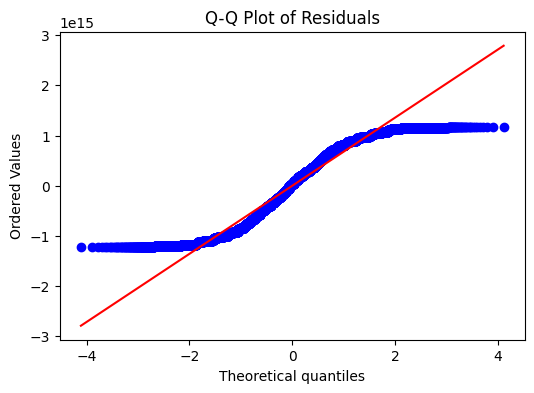

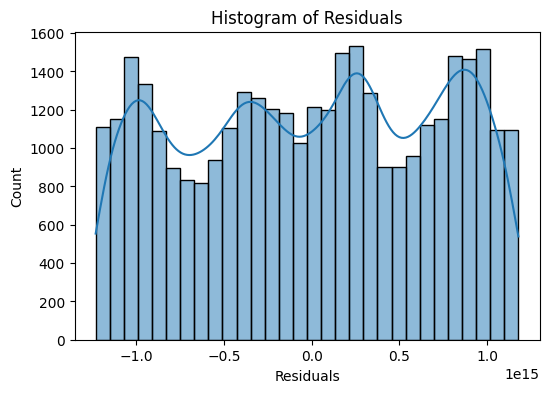

In [65]:
import scipy.stats as stats
residuals = y_test - y_pred 

sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [66]:
# Compare the scaled vs unscaled features used in the final model

X_unscaled = pd.DataFrame(X_train, columns=feature_names)  # Replace `feature_names` with actual names


NameError: name 'feature_names' is not defined

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes , The categorical variable is imapcting the delivery time taken.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**This is the dtaset percentage allocatyed for test ing.0.2 means 20% data allocaed for testing and 80% for training
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

using boxplots.This shows the values out side of teh box 



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>distance,totalorder items,sub totel order items



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear reggression alogorithm is used to predict continous numerical values.formulaa is y=mx+c.Y is dependent variable.x is independant variable.m is slope and c is intercept.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Simple leinear regression ahs one dependent variable.multiple linear regression has more than 1 dependent variable.
Multiple linear regression  example is Predicting house prices based on square footage, number of bedrooms, and location score.
simple linear regression  example is Predicting house prices based on only square footage.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
It helps to understand how is the actial value and predicted value related.Minimizing the cost function means finding the best values of model parameters (slope and intercept) to reduce prediction errors.It can be done by normal equation or gardeienr descent.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**This helps to diagnose linear regression model is appropriate.
>